In [1]:
prescription_vals = {
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 0.5717255, 
                    }
prescription_vals['beam_ratio'] = 0.2
prescription_vals['tilt_x'] = 0.00
prescription_vals['tilt_y'] = 0.00


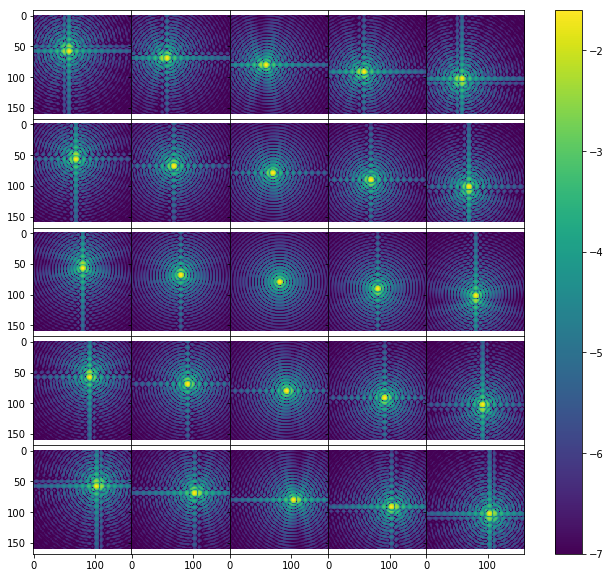

In [13]:
%matplotlib inline
#import matplotlib.pyplot as plt

import proper
import numpy as np
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (11,10)

wavelength = 0.6 # microns
gridsize = 2048 #512
c = int(gridsize/2)
sz = 80

offsets_x = [-2., -1., 0., 1., 2.]
offsets_y = [-2., -1., 0., 1., 2.]

#fig = plt.figure(figsize=(7, 6)) 
fig, axes = plt.subplots(nrows=len(offsets_x), ncols=len(offsets_y),sharex=True, sharey=True)
it = iter(axes.flat)
for dy in offsets_y:
    for dx in offsets_x:
        prescription_vals['tilt_x'] = dx
        prescription_vals['tilt_y'] = dy
        (wavefront, sampling) = proper.prop_run('prescription_quad', wavelength, gridsize, QUIET=True, PRINT_INTENSITY=False, PASSVALUE=prescription_vals)
        ax = next(it)
        im = ax.imshow(np.log10(wavefront[c-sz:c+sz, c-sz:c+sz]), interpolation = 'None', cmap='viridis', clim=[-7, -1.6])
#        ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)
#plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes], visible=False)
plt.setp([a.get_yticklabels() for a in fig.axes], visible=False)
plt.setp([a.get_yticklabels() for a in fig.axes[::len(offsets_x)]], visible=True)
plt.setp([a.get_xticklabels() for a in fig.axes[-len(offsets_x):]], visible=True)
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()